<a href="https://colab.research.google.com/github/CSandyHub/SHALA2020/blob/master/Assignment_2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load the file as a dataframe 
df = pd.read_csv("train.csv")
movies = pd.read_csv("moviesData.csv")

In [122]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [148]:
# Print the first five rows of MonthlyRate
df['MonthlyRate'][:5]

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [149]:
# Find the details of MonthlyRate
df.MonthlyRate.describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [150]:
print(df.count().sum())
# Check for missing values
missingValues =sum(i for i in df.isna().sum())
print(missingValues)
# Drop the missing values 
if missingValues > 0:
  df.dropna()
# Print the size of df after dropping 
print(df.count().sum())


34952
0
34952


### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
# Add a column named MonthRateNew 
df['MonthRateNew'] = (df['MonthlyRate']-df['MonthlyRate'].mean())/df['MonthlyRate'].std()


### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [169]:
# Check for missing values 

print(movies.shape)
#Drop Missing Values
movies2=movies.dropna()
print(movies2.shape)
# Replace the missing values 
# You can use SimpleImputer of sklearn for this
from sklearn.impute import SimpleImputer
meanImputer=SimpleImputer(missing_values=np.nan,strategy='mean')
medianImputer=SimpleImputer(missing_values=np.nan,strategy='median')
unknownImputer=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value='UNKNOWN')
movies['runtime'] =meanImputer.fit_transform(movies[['runtime']]).ravel()
movies['dvd_rel_year'] =medianImputer.fit_transform(movies[['dvd_rel_year']]).ravel()
movies['dvd_rel_month'] =medianImputer.fit_transform(movies[['dvd_rel_month']]).ravel()
movies['dvd_rel_day'] =medianImputer.fit_transform(movies[['dvd_rel_day']]).ravel()
movies['studio'] =unknownImputer.fit_transform(movies[['studio']]).ravel()
movies['director'] =unknownImputer.fit_transform(movies[['director']]).ravel()
movies['actor1'] =unknownImputer.fit_transform(movies[['actor1']]).ravel()
movies['actor2'] =unknownImputer.fit_transform(movies[['actor2']]).ravel()
movies['actor3'] =unknownImputer.fit_transform(movies[['actor3']]).ravel()
movies['actor4'] =unknownImputer.fit_transform(movies[['actor4']]).ravel()
movies['actor5'] =unknownImputer.fit_transform(movies[['actor5']]).ravel()
movies.isna().sum()


(600, 31)
(600, 31)


Unnamed: 0          0
title               0
title_type          0
genre               0
runtime             0
mpaa_rating         0
studio              0
thtr_rel_year       0
thtr_rel_month      0
thtr_rel_day        0
dvd_rel_year        0
dvd_rel_month       0
dvd_rel_day         0
imdb_rating         0
imdb_num_votes      0
critics_rating      0
critics_score       0
audience_rating     0
audience_score      0
best_pic_nom        0
best_pic_win        0
best_actor_win      0
best_actress_win    0
best_dir_win        0
top200_box          0
director            0
actor1              0
actor2              0
actor3              0
actor4              0
actor5              0
dtype: int64

In [175]:
df.Attrition.value_counts()

0    856
1    172
Name: Attrition, dtype: int64

---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

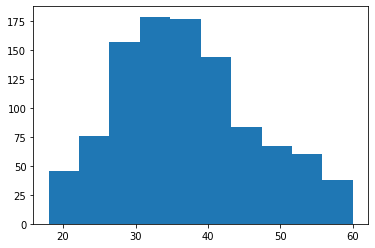

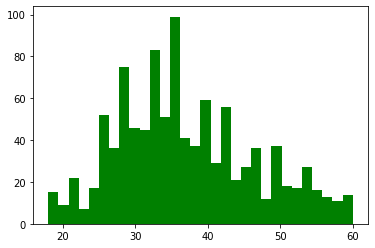

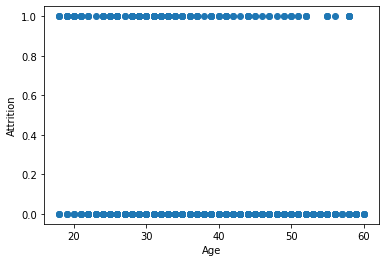

In [180]:
# Plot and modify the histogram of Age
plt.hist(df.Age)
plt.show()
plt.hist(df.Age,bins=30,color='green')
plt.show()
# Draw a scatter plot between Age and Attrition
plt.scatter(df.Age,df.Attrition)
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.show()

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

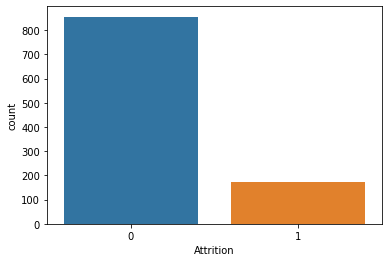

In [195]:
# Get a series of counts of values of Attrition
df.Attrition.value_counts()
# Draw a countplot for Attrition 
chart=sns.countplot(x='Attrition',data=df)
# You may use countplot of seaborn for this 


### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

Text(0, 0.5, 'Number of Attrition')

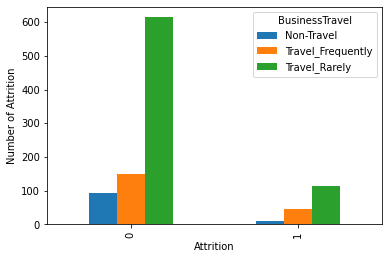

In [197]:
# Draw a cross tab of Attritiona and BusinessTravel 
cross_tab=pd.crosstab(df.Attrition,df.BusinessTravel)
cross_tab.plot(kind='bar')
plt.ylabel('Number of Attrition')
# You may use crosstab of pandas for this 



### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

Text(0, 0.5, 'Number of Attrition')

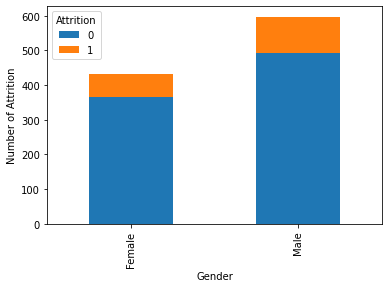

In [200]:
# Draw a stacked bar chart between Attrition and Gender 
stack_bar=pd.crosstab(df.Gender,df.Attrition)
stack_bar.plot(kind='bar',stacked=True)
plt.ylabel('Number of Attrition')


### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

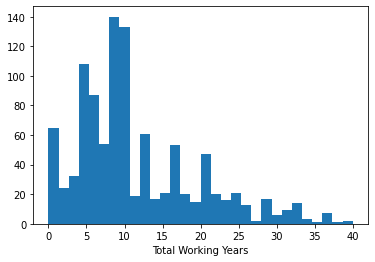

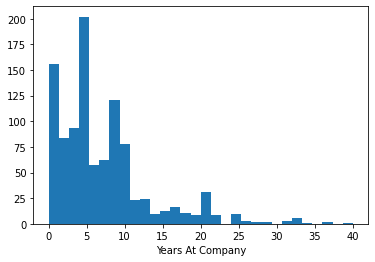

In [202]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.hist(df.TotalWorkingYears,bins=30)
plt.xlabel('Total Working Years')
plt.show()
# Draw a histogram of YearsAtCompany
plt.hist(df.YearsAtCompany,bins=30)
plt.xlabel('Years At Company')
plt.show()


### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


[Text(0, 0, 'Sales'),
 Text(0, 0, 'Research & Development'),
 Text(0, 0, 'Human Resources')]

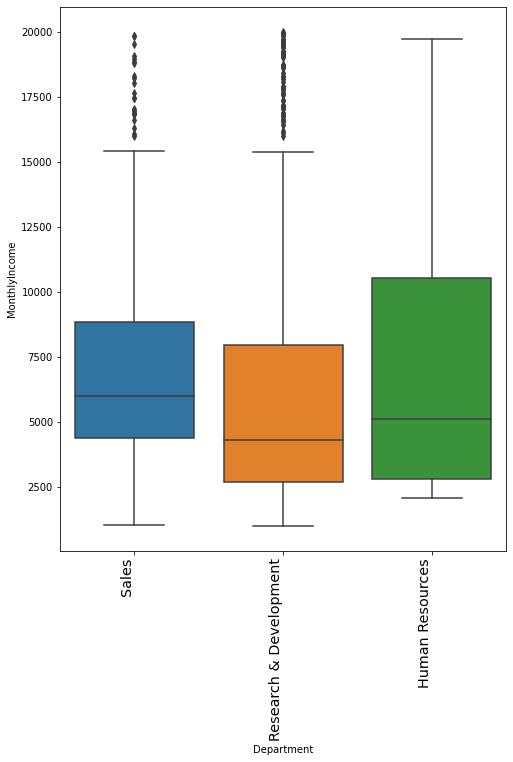

In [206]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
plt.figure(figsize=(8,10))
bxplt = sns.boxplot('Department','MonthlyIncome', data=df)
bxplt.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)


### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

([<matplotlib.patches.Wedge at 0x7fb964c0acf8>,
 [Text(0.8542961340812947, 0.6929488547459725, 'Sales Executive'),
  Text(-0.45945693362420414, 0.9994495115535571, 'Research Scientist'),
  Text(-1.0981462091349679, -0.06383496974620964, 'Laboratory Technician'),
  Text(-0.6503653604759383, -0.8871442373667334, 'Manufacturing Director'),
  Text(-0.05712202505487643, -1.0985158507065933, 'Healthcare Representative'),
  Text(0.47770465248811617, -0.9908573383647155, 'Manager'),
  Text(0.841447151537986, -0.708496077031207, 'Research Director'),
  Text(1.03505987357499, -0.37235877606808926, 'Sales Representative'),
  Text(1.09597534812125, -0.0940108308148859, 'Human Resources')])

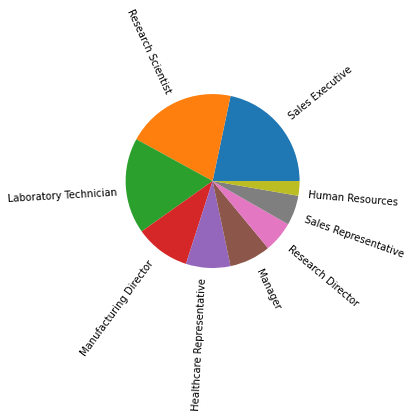

In [211]:
# Create a piechart of JobRole 
role_counts=df.JobRole.value_counts()
# You will need to find the counts of unique values in JobRole. 
plt.pie(role_counts,labels=role_counts.index,rotatelabels=True)



